In [1]:
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
import matplotlib.pyplot as plt

In [2]:
xls_data=pd.read_excel("./table.xlsx")

In [3]:
t2_dat=xls_data.loc[:,"# of turns":"HFSS"]

In [4]:
t4_dat=xls_data.loc[:,"# of turns.2":"HFSS.2"]

In [5]:
t2_dat=t2_dat.replace(np.nan,0)
t4_dat=t4_dat.replace(np.nan,0)

In [6]:
def data_restore(dat):
    for col_name in dat.columns[:5]:
        temp=0
        for i in range(len(dat[col_name])):
            if (dat.loc[i,col_name]!=0):
                temp=dat.loc[i,col_name]
            if (dat.loc[i,col_name]==0):
                dat.loc[i,col_name]=temp
    return dat

In [7]:
t2_dat=data_restore(t2_dat)
t4_dat=data_restore(t4_dat)

In [8]:
total_dat_temp=np.vstack([t2_dat.values,t4_dat.values])

In [9]:
del_index=np.where(total_dat_temp[:,6]==0)[0]

In [10]:
total_dat_temp=pd.DataFrame(total_dat_temp,columns=t2_dat.columns)

In [11]:
total_dat=total_dat_temp.drop(del_index)

In [12]:
total_dat.to_csv("preprocessed_data.csv",
                 columns=total_dat.columns,sep=",", index=False)

In [13]:
data=total_dat.values

In [14]:
log_dat_x=np.log(data[:,:6])

In [15]:
pow_dat_x=np.power(data[:,:6],2)

In [16]:
log_dat_y=np.log(data[:,6])

In [17]:
x_train=np.hstack([log_dat_x,data[:,:6],pow_dat_x])

In [18]:
mean_x=np.mean(x_train, axis=0)
std_x=np.std(x_train, axis=0)

In [19]:
x_train=(x_train - mean_x) / std_x

In [20]:
mean_y=np.mean(log_dat_y)
std_y=np.std(log_dat_y)

In [21]:
y_train=(log_dat_y-mean_y)/std_y

In [22]:
x_train=torch.FloatTensor(x_train)
y_train=torch.FloatTensor(y_train)

In [23]:
model=nn.Linear(18,1)

In [24]:
print(list(model.parameters()))

[Parameter containing:
tensor([[ 0.0511,  0.1591,  0.0664,  0.2222, -0.1216,  0.1028, -0.0626,  0.1754,
         -0.2183, -0.1359,  0.0909,  0.1157,  0.2254,  0.1575, -0.2103, -0.1408,
          0.1673, -0.0450]], requires_grad=True), Parameter containing:
tensor([0.1910], requires_grad=True)]


In [25]:
optimizer = torch.optim.SGD(model.parameters(), lr=1e-5)

In [26]:
nb_epochs = 1000000
for epoch in range(nb_epochs+1):

    prediction = torch.squeeze(model(x_train))
    cost = F.mse_loss(prediction, y_train) 
    optimizer.zero_grad()
    cost.backward()
    optimizer.step()

    if epoch % 100 == 0:
      print('Epoch {:4d}/{} Cost: {:.6f}'.format(
          epoch, nb_epochs, cost.item()
      ))

Epoch    0/1000000 Cost: 1.976105
Epoch  100/1000000 Cost: 1.955606
Epoch  200/1000000 Cost: 1.935339
Epoch  300/1000000 Cost: 1.915303
Epoch  400/1000000 Cost: 1.895497
Epoch  500/1000000 Cost: 1.875917
Epoch  600/1000000 Cost: 1.856559
Epoch  700/1000000 Cost: 1.837424
Epoch  800/1000000 Cost: 1.818507
Epoch  900/1000000 Cost: 1.799806
Epoch 1000/1000000 Cost: 1.781318
Epoch 1100/1000000 Cost: 1.763040
Epoch 1200/1000000 Cost: 1.744972
Epoch 1300/1000000 Cost: 1.727109
Epoch 1400/1000000 Cost: 1.709450
Epoch 1500/1000000 Cost: 1.691992
Epoch 1600/1000000 Cost: 1.674732
Epoch 1700/1000000 Cost: 1.657669
Epoch 1800/1000000 Cost: 1.640801
Epoch 1900/1000000 Cost: 1.624124
Epoch 2000/1000000 Cost: 1.607637
Epoch 2100/1000000 Cost: 1.591337
Epoch 2200/1000000 Cost: 1.575223
Epoch 2300/1000000 Cost: 1.559292
Epoch 2400/1000000 Cost: 1.543542
Epoch 2500/1000000 Cost: 1.527970
Epoch 2600/1000000 Cost: 1.512576
Epoch 2700/1000000 Cost: 1.497356
Epoch 2800/1000000 Cost: 1.482309
Epoch 2900/100

Epoch 24000/1000000 Cost: 0.269566
Epoch 24100/1000000 Cost: 0.268097
Epoch 24200/1000000 Cost: 0.266644
Epoch 24300/1000000 Cost: 0.265206
Epoch 24400/1000000 Cost: 0.263782
Epoch 24500/1000000 Cost: 0.262372
Epoch 24600/1000000 Cost: 0.260977
Epoch 24700/1000000 Cost: 0.259597
Epoch 24800/1000000 Cost: 0.258230
Epoch 24900/1000000 Cost: 0.256877
Epoch 25000/1000000 Cost: 0.255538
Epoch 25100/1000000 Cost: 0.254212
Epoch 25200/1000000 Cost: 0.252899
Epoch 25300/1000000 Cost: 0.251600
Epoch 25400/1000000 Cost: 0.250314
Epoch 25500/1000000 Cost: 0.249042
Epoch 25600/1000000 Cost: 0.247781
Epoch 25700/1000000 Cost: 0.246534
Epoch 25800/1000000 Cost: 0.245299
Epoch 25900/1000000 Cost: 0.244076
Epoch 26000/1000000 Cost: 0.242866
Epoch 26100/1000000 Cost: 0.241668
Epoch 26200/1000000 Cost: 0.240482
Epoch 26300/1000000 Cost: 0.239308
Epoch 26400/1000000 Cost: 0.238145
Epoch 26500/1000000 Cost: 0.236994
Epoch 26600/1000000 Cost: 0.235855
Epoch 26700/1000000 Cost: 0.234726
Epoch 26800/1000000 

Epoch 47600/1000000 Cost: 0.131111
Epoch 47700/1000000 Cost: 0.130923
Epoch 47800/1000000 Cost: 0.130736
Epoch 47900/1000000 Cost: 0.130550
Epoch 48000/1000000 Cost: 0.130366
Epoch 48100/1000000 Cost: 0.130183
Epoch 48200/1000000 Cost: 0.130001
Epoch 48300/1000000 Cost: 0.129820
Epoch 48400/1000000 Cost: 0.129640
Epoch 48500/1000000 Cost: 0.129462
Epoch 48600/1000000 Cost: 0.129284
Epoch 48700/1000000 Cost: 0.129108
Epoch 48800/1000000 Cost: 0.128933
Epoch 48900/1000000 Cost: 0.128759
Epoch 49000/1000000 Cost: 0.128586
Epoch 49100/1000000 Cost: 0.128414
Epoch 49200/1000000 Cost: 0.128244
Epoch 49300/1000000 Cost: 0.128074
Epoch 49400/1000000 Cost: 0.127906
Epoch 49500/1000000 Cost: 0.127738
Epoch 49600/1000000 Cost: 0.127572
Epoch 49700/1000000 Cost: 0.127406
Epoch 49800/1000000 Cost: 0.127242
Epoch 49900/1000000 Cost: 0.127078
Epoch 50000/1000000 Cost: 0.126916
Epoch 50100/1000000 Cost: 0.126754
Epoch 50200/1000000 Cost: 0.126594
Epoch 50300/1000000 Cost: 0.126434
Epoch 50400/1000000 

Epoch 71200/1000000 Cost: 0.105306
Epoch 71300/1000000 Cost: 0.105237
Epoch 71400/1000000 Cost: 0.105168
Epoch 71500/1000000 Cost: 0.105099
Epoch 71600/1000000 Cost: 0.105031
Epoch 71700/1000000 Cost: 0.104962
Epoch 71800/1000000 Cost: 0.104894
Epoch 71900/1000000 Cost: 0.104826
Epoch 72000/1000000 Cost: 0.104758
Epoch 72100/1000000 Cost: 0.104690
Epoch 72200/1000000 Cost: 0.104623
Epoch 72300/1000000 Cost: 0.104556
Epoch 72400/1000000 Cost: 0.104489
Epoch 72500/1000000 Cost: 0.104422
Epoch 72600/1000000 Cost: 0.104356
Epoch 72700/1000000 Cost: 0.104289
Epoch 72800/1000000 Cost: 0.104222
Epoch 72900/1000000 Cost: 0.104156
Epoch 73000/1000000 Cost: 0.104090
Epoch 73100/1000000 Cost: 0.104023
Epoch 73200/1000000 Cost: 0.103957
Epoch 73300/1000000 Cost: 0.103891
Epoch 73400/1000000 Cost: 0.103825
Epoch 73500/1000000 Cost: 0.103760
Epoch 73600/1000000 Cost: 0.103694
Epoch 73700/1000000 Cost: 0.103629
Epoch 73800/1000000 Cost: 0.103564
Epoch 73900/1000000 Cost: 0.103499
Epoch 74000/1000000 

Epoch 94900/1000000 Cost: 0.091944
Epoch 95000/1000000 Cost: 0.091896
Epoch 95100/1000000 Cost: 0.091848
Epoch 95200/1000000 Cost: 0.091800
Epoch 95300/1000000 Cost: 0.091752
Epoch 95400/1000000 Cost: 0.091704
Epoch 95500/1000000 Cost: 0.091657
Epoch 95600/1000000 Cost: 0.091609
Epoch 95700/1000000 Cost: 0.091561
Epoch 95800/1000000 Cost: 0.091513
Epoch 95900/1000000 Cost: 0.091466
Epoch 96000/1000000 Cost: 0.091418
Epoch 96100/1000000 Cost: 0.091371
Epoch 96200/1000000 Cost: 0.091324
Epoch 96300/1000000 Cost: 0.091277
Epoch 96400/1000000 Cost: 0.091230
Epoch 96500/1000000 Cost: 0.091183
Epoch 96600/1000000 Cost: 0.091136
Epoch 96700/1000000 Cost: 0.091089
Epoch 96800/1000000 Cost: 0.091042
Epoch 96900/1000000 Cost: 0.090995
Epoch 97000/1000000 Cost: 0.090948
Epoch 97100/1000000 Cost: 0.090902
Epoch 97200/1000000 Cost: 0.090855
Epoch 97300/1000000 Cost: 0.090808
Epoch 97400/1000000 Cost: 0.090761
Epoch 97500/1000000 Cost: 0.090714
Epoch 97600/1000000 Cost: 0.090668
Epoch 97700/1000000 

Epoch 117900/1000000 Cost: 0.081994
Epoch 118000/1000000 Cost: 0.081954
Epoch 118100/1000000 Cost: 0.081915
Epoch 118200/1000000 Cost: 0.081876
Epoch 118300/1000000 Cost: 0.081837
Epoch 118400/1000000 Cost: 0.081798
Epoch 118500/1000000 Cost: 0.081758
Epoch 118600/1000000 Cost: 0.081719
Epoch 118700/1000000 Cost: 0.081680
Epoch 118800/1000000 Cost: 0.081641
Epoch 118900/1000000 Cost: 0.081602
Epoch 119000/1000000 Cost: 0.081563
Epoch 119100/1000000 Cost: 0.081524
Epoch 119200/1000000 Cost: 0.081485
Epoch 119300/1000000 Cost: 0.081446
Epoch 119400/1000000 Cost: 0.081407
Epoch 119500/1000000 Cost: 0.081368
Epoch 119600/1000000 Cost: 0.081329
Epoch 119700/1000000 Cost: 0.081290
Epoch 119800/1000000 Cost: 0.081251
Epoch 119900/1000000 Cost: 0.081212
Epoch 120000/1000000 Cost: 0.081173
Epoch 120100/1000000 Cost: 0.081134
Epoch 120200/1000000 Cost: 0.081096
Epoch 120300/1000000 Cost: 0.081057
Epoch 120400/1000000 Cost: 0.081018
Epoch 120500/1000000 Cost: 0.080980
Epoch 120600/1000000 Cost: 0

Epoch 140900/1000000 Cost: 0.073647
Epoch 141000/1000000 Cost: 0.073614
Epoch 141100/1000000 Cost: 0.073580
Epoch 141200/1000000 Cost: 0.073547
Epoch 141300/1000000 Cost: 0.073514
Epoch 141400/1000000 Cost: 0.073480
Epoch 141500/1000000 Cost: 0.073447
Epoch 141600/1000000 Cost: 0.073414
Epoch 141700/1000000 Cost: 0.073380
Epoch 141800/1000000 Cost: 0.073347
Epoch 141900/1000000 Cost: 0.073314
Epoch 142000/1000000 Cost: 0.073281
Epoch 142100/1000000 Cost: 0.073247
Epoch 142200/1000000 Cost: 0.073214
Epoch 142300/1000000 Cost: 0.073181
Epoch 142400/1000000 Cost: 0.073147
Epoch 142500/1000000 Cost: 0.073114
Epoch 142600/1000000 Cost: 0.073081
Epoch 142700/1000000 Cost: 0.073048
Epoch 142800/1000000 Cost: 0.073015
Epoch 142900/1000000 Cost: 0.072981
Epoch 143000/1000000 Cost: 0.072948
Epoch 143100/1000000 Cost: 0.072915
Epoch 143200/1000000 Cost: 0.072882
Epoch 143300/1000000 Cost: 0.072849
Epoch 143400/1000000 Cost: 0.072816
Epoch 143500/1000000 Cost: 0.072782
Epoch 143600/1000000 Cost: 0

Epoch 163800/1000000 Cost: 0.066522
Epoch 163900/1000000 Cost: 0.066493
Epoch 164000/1000000 Cost: 0.066464
Epoch 164100/1000000 Cost: 0.066435
Epoch 164200/1000000 Cost: 0.066406
Epoch 164300/1000000 Cost: 0.066377
Epoch 164400/1000000 Cost: 0.066348
Epoch 164500/1000000 Cost: 0.066319
Epoch 164600/1000000 Cost: 0.066291
Epoch 164700/1000000 Cost: 0.066262
Epoch 164800/1000000 Cost: 0.066233
Epoch 164900/1000000 Cost: 0.066204
Epoch 165000/1000000 Cost: 0.066175
Epoch 165100/1000000 Cost: 0.066146
Epoch 165200/1000000 Cost: 0.066117
Epoch 165300/1000000 Cost: 0.066088
Epoch 165400/1000000 Cost: 0.066059
Epoch 165500/1000000 Cost: 0.066030
Epoch 165600/1000000 Cost: 0.066002
Epoch 165700/1000000 Cost: 0.065973
Epoch 165800/1000000 Cost: 0.065944
Epoch 165900/1000000 Cost: 0.065915
Epoch 166000/1000000 Cost: 0.065886
Epoch 166100/1000000 Cost: 0.065857
Epoch 166200/1000000 Cost: 0.065829
Epoch 166300/1000000 Cost: 0.065800
Epoch 166400/1000000 Cost: 0.065771
Epoch 166500/1000000 Cost: 0

Epoch 187200/1000000 Cost: 0.060246
Epoch 187300/1000000 Cost: 0.060221
Epoch 187400/1000000 Cost: 0.060197
Epoch 187500/1000000 Cost: 0.060172
Epoch 187600/1000000 Cost: 0.060147
Epoch 187700/1000000 Cost: 0.060123
Epoch 187800/1000000 Cost: 0.060098
Epoch 187900/1000000 Cost: 0.060074
Epoch 188000/1000000 Cost: 0.060049
Epoch 188100/1000000 Cost: 0.060024
Epoch 188200/1000000 Cost: 0.060000
Epoch 188300/1000000 Cost: 0.059975
Epoch 188400/1000000 Cost: 0.059951
Epoch 188500/1000000 Cost: 0.059926
Epoch 188600/1000000 Cost: 0.059901
Epoch 188700/1000000 Cost: 0.059877
Epoch 188800/1000000 Cost: 0.059852
Epoch 188900/1000000 Cost: 0.059828
Epoch 189000/1000000 Cost: 0.059803
Epoch 189100/1000000 Cost: 0.059779
Epoch 189200/1000000 Cost: 0.059754
Epoch 189300/1000000 Cost: 0.059730
Epoch 189400/1000000 Cost: 0.059705
Epoch 189500/1000000 Cost: 0.059681
Epoch 189600/1000000 Cost: 0.059656
Epoch 189700/1000000 Cost: 0.059632
Epoch 189800/1000000 Cost: 0.059607
Epoch 189900/1000000 Cost: 0

Epoch 210600/1000000 Cost: 0.054824
Epoch 210700/1000000 Cost: 0.054803
Epoch 210800/1000000 Cost: 0.054781
Epoch 210900/1000000 Cost: 0.054759
Epoch 211000/1000000 Cost: 0.054738
Epoch 211100/1000000 Cost: 0.054716
Epoch 211200/1000000 Cost: 0.054694
Epoch 211300/1000000 Cost: 0.054673
Epoch 211400/1000000 Cost: 0.054651
Epoch 211500/1000000 Cost: 0.054630
Epoch 211600/1000000 Cost: 0.054608
Epoch 211700/1000000 Cost: 0.054586
Epoch 211800/1000000 Cost: 0.054565
Epoch 211900/1000000 Cost: 0.054543
Epoch 212000/1000000 Cost: 0.054522
Epoch 212100/1000000 Cost: 0.054500
Epoch 212200/1000000 Cost: 0.054479
Epoch 212300/1000000 Cost: 0.054457
Epoch 212400/1000000 Cost: 0.054436
Epoch 212500/1000000 Cost: 0.054414
Epoch 212600/1000000 Cost: 0.054392
Epoch 212700/1000000 Cost: 0.054371
Epoch 212800/1000000 Cost: 0.054349
Epoch 212900/1000000 Cost: 0.054328
Epoch 213000/1000000 Cost: 0.054306
Epoch 213100/1000000 Cost: 0.054285
Epoch 213200/1000000 Cost: 0.054263
Epoch 213300/1000000 Cost: 0

Epoch 233600/1000000 Cost: 0.050193
Epoch 233700/1000000 Cost: 0.050174
Epoch 233800/1000000 Cost: 0.050155
Epoch 233900/1000000 Cost: 0.050136
Epoch 234000/1000000 Cost: 0.050118
Epoch 234100/1000000 Cost: 0.050099
Epoch 234200/1000000 Cost: 0.050081
Epoch 234300/1000000 Cost: 0.050063
Epoch 234400/1000000 Cost: 0.050044
Epoch 234500/1000000 Cost: 0.050026
Epoch 234600/1000000 Cost: 0.050008
Epoch 234700/1000000 Cost: 0.049989
Epoch 234800/1000000 Cost: 0.049971
Epoch 234900/1000000 Cost: 0.049953
Epoch 235000/1000000 Cost: 0.049935
Epoch 235100/1000000 Cost: 0.049916
Epoch 235200/1000000 Cost: 0.049898
Epoch 235300/1000000 Cost: 0.049880
Epoch 235400/1000000 Cost: 0.049861
Epoch 235500/1000000 Cost: 0.049843
Epoch 235600/1000000 Cost: 0.049825
Epoch 235700/1000000 Cost: 0.049807
Epoch 235800/1000000 Cost: 0.049789
Epoch 235900/1000000 Cost: 0.049770
Epoch 236000/1000000 Cost: 0.049752
Epoch 236100/1000000 Cost: 0.049734
Epoch 236200/1000000 Cost: 0.049716
Epoch 236300/1000000 Cost: 0

Epoch 256600/1000000 Cost: 0.046187
Epoch 256700/1000000 Cost: 0.046171
Epoch 256800/1000000 Cost: 0.046155
Epoch 256900/1000000 Cost: 0.046139
Epoch 257000/1000000 Cost: 0.046123
Epoch 257100/1000000 Cost: 0.046107
Epoch 257200/1000000 Cost: 0.046091
Epoch 257300/1000000 Cost: 0.046075
Epoch 257400/1000000 Cost: 0.046059
Epoch 257500/1000000 Cost: 0.046043
Epoch 257600/1000000 Cost: 0.046027
Epoch 257700/1000000 Cost: 0.046011
Epoch 257800/1000000 Cost: 0.045995
Epoch 257900/1000000 Cost: 0.045979
Epoch 258000/1000000 Cost: 0.045963
Epoch 258100/1000000 Cost: 0.045947
Epoch 258200/1000000 Cost: 0.045931
Epoch 258300/1000000 Cost: 0.045915
Epoch 258400/1000000 Cost: 0.045899
Epoch 258500/1000000 Cost: 0.045883
Epoch 258600/1000000 Cost: 0.045867
Epoch 258700/1000000 Cost: 0.045851
Epoch 258800/1000000 Cost: 0.045835
Epoch 258900/1000000 Cost: 0.045819
Epoch 259000/1000000 Cost: 0.045804
Epoch 259100/1000000 Cost: 0.045788
Epoch 259200/1000000 Cost: 0.045772
Epoch 259300/1000000 Cost: 0

Epoch 279400/1000000 Cost: 0.042732
Epoch 279500/1000000 Cost: 0.042718
Epoch 279600/1000000 Cost: 0.042705
Epoch 279700/1000000 Cost: 0.042691
Epoch 279800/1000000 Cost: 0.042677
Epoch 279900/1000000 Cost: 0.042663
Epoch 280000/1000000 Cost: 0.042649
Epoch 280100/1000000 Cost: 0.042635
Epoch 280200/1000000 Cost: 0.042621
Epoch 280300/1000000 Cost: 0.042607
Epoch 280400/1000000 Cost: 0.042593
Epoch 280500/1000000 Cost: 0.042579
Epoch 280600/1000000 Cost: 0.042565
Epoch 280700/1000000 Cost: 0.042551
Epoch 280800/1000000 Cost: 0.042537
Epoch 280900/1000000 Cost: 0.042523
Epoch 281000/1000000 Cost: 0.042509
Epoch 281100/1000000 Cost: 0.042495
Epoch 281200/1000000 Cost: 0.042481
Epoch 281300/1000000 Cost: 0.042467
Epoch 281400/1000000 Cost: 0.042453
Epoch 281500/1000000 Cost: 0.042440
Epoch 281600/1000000 Cost: 0.042426
Epoch 281700/1000000 Cost: 0.042412
Epoch 281800/1000000 Cost: 0.042398
Epoch 281900/1000000 Cost: 0.042384
Epoch 282000/1000000 Cost: 0.042370
Epoch 282100/1000000 Cost: 0

Epoch 302600/1000000 Cost: 0.039674
Epoch 302700/1000000 Cost: 0.039662
Epoch 302800/1000000 Cost: 0.039649
Epoch 302900/1000000 Cost: 0.039637
Epoch 303000/1000000 Cost: 0.039625
Epoch 303100/1000000 Cost: 0.039613
Epoch 303200/1000000 Cost: 0.039601
Epoch 303300/1000000 Cost: 0.039589
Epoch 303400/1000000 Cost: 0.039577
Epoch 303500/1000000 Cost: 0.039564
Epoch 303600/1000000 Cost: 0.039552
Epoch 303700/1000000 Cost: 0.039540
Epoch 303800/1000000 Cost: 0.039528
Epoch 303900/1000000 Cost: 0.039516
Epoch 304000/1000000 Cost: 0.039504
Epoch 304100/1000000 Cost: 0.039492
Epoch 304200/1000000 Cost: 0.039480
Epoch 304300/1000000 Cost: 0.039468
Epoch 304400/1000000 Cost: 0.039456
Epoch 304500/1000000 Cost: 0.039444
Epoch 304600/1000000 Cost: 0.039431
Epoch 304700/1000000 Cost: 0.039419
Epoch 304800/1000000 Cost: 0.039407
Epoch 304900/1000000 Cost: 0.039395
Epoch 305000/1000000 Cost: 0.039383
Epoch 305100/1000000 Cost: 0.039371
Epoch 305200/1000000 Cost: 0.039359
Epoch 305300/1000000 Cost: 0

Epoch 325500/1000000 Cost: 0.037051
Epoch 325600/1000000 Cost: 0.037040
Epoch 325700/1000000 Cost: 0.037029
Epoch 325800/1000000 Cost: 0.037019
Epoch 325900/1000000 Cost: 0.037008
Epoch 326000/1000000 Cost: 0.036998
Epoch 326100/1000000 Cost: 0.036987
Epoch 326200/1000000 Cost: 0.036977
Epoch 326300/1000000 Cost: 0.036966
Epoch 326400/1000000 Cost: 0.036956
Epoch 326500/1000000 Cost: 0.036945
Epoch 326600/1000000 Cost: 0.036935
Epoch 326700/1000000 Cost: 0.036924
Epoch 326800/1000000 Cost: 0.036914
Epoch 326900/1000000 Cost: 0.036903
Epoch 327000/1000000 Cost: 0.036893
Epoch 327100/1000000 Cost: 0.036882
Epoch 327200/1000000 Cost: 0.036872
Epoch 327300/1000000 Cost: 0.036861
Epoch 327400/1000000 Cost: 0.036850
Epoch 327500/1000000 Cost: 0.036840
Epoch 327600/1000000 Cost: 0.036830
Epoch 327700/1000000 Cost: 0.036819
Epoch 327800/1000000 Cost: 0.036809
Epoch 327900/1000000 Cost: 0.036798
Epoch 328000/1000000 Cost: 0.036788
Epoch 328100/1000000 Cost: 0.036777
Epoch 328200/1000000 Cost: 0

Epoch 348300/1000000 Cost: 0.034771
Epoch 348400/1000000 Cost: 0.034762
Epoch 348500/1000000 Cost: 0.034753
Epoch 348600/1000000 Cost: 0.034744
Epoch 348700/1000000 Cost: 0.034735
Epoch 348800/1000000 Cost: 0.034726
Epoch 348900/1000000 Cost: 0.034717
Epoch 349000/1000000 Cost: 0.034708
Epoch 349100/1000000 Cost: 0.034699
Epoch 349200/1000000 Cost: 0.034689
Epoch 349300/1000000 Cost: 0.034680
Epoch 349400/1000000 Cost: 0.034671
Epoch 349500/1000000 Cost: 0.034662
Epoch 349600/1000000 Cost: 0.034653
Epoch 349700/1000000 Cost: 0.034644
Epoch 349800/1000000 Cost: 0.034635
Epoch 349900/1000000 Cost: 0.034626
Epoch 350000/1000000 Cost: 0.034617
Epoch 350100/1000000 Cost: 0.034608
Epoch 350200/1000000 Cost: 0.034599
Epoch 350300/1000000 Cost: 0.034590
Epoch 350400/1000000 Cost: 0.034581
Epoch 350500/1000000 Cost: 0.034572
Epoch 350600/1000000 Cost: 0.034562
Epoch 350700/1000000 Cost: 0.034553
Epoch 350800/1000000 Cost: 0.034544
Epoch 350900/1000000 Cost: 0.034535
Epoch 351000/1000000 Cost: 0

Epoch 371100/1000000 Cost: 0.032787
Epoch 371200/1000000 Cost: 0.032779
Epoch 371300/1000000 Cost: 0.032771
Epoch 371400/1000000 Cost: 0.032763
Epoch 371500/1000000 Cost: 0.032755
Epoch 371600/1000000 Cost: 0.032747
Epoch 371700/1000000 Cost: 0.032740
Epoch 371800/1000000 Cost: 0.032732
Epoch 371900/1000000 Cost: 0.032724
Epoch 372000/1000000 Cost: 0.032716
Epoch 372100/1000000 Cost: 0.032708
Epoch 372200/1000000 Cost: 0.032700
Epoch 372300/1000000 Cost: 0.032692
Epoch 372400/1000000 Cost: 0.032685
Epoch 372500/1000000 Cost: 0.032677
Epoch 372600/1000000 Cost: 0.032669
Epoch 372700/1000000 Cost: 0.032661
Epoch 372800/1000000 Cost: 0.032653
Epoch 372900/1000000 Cost: 0.032645
Epoch 373000/1000000 Cost: 0.032638
Epoch 373100/1000000 Cost: 0.032630
Epoch 373200/1000000 Cost: 0.032622
Epoch 373300/1000000 Cost: 0.032614
Epoch 373400/1000000 Cost: 0.032606
Epoch 373500/1000000 Cost: 0.032599
Epoch 373600/1000000 Cost: 0.032591
Epoch 373700/1000000 Cost: 0.032583
Epoch 373800/1000000 Cost: 0

Epoch 394100/1000000 Cost: 0.031062
Epoch 394200/1000000 Cost: 0.031054
Epoch 394300/1000000 Cost: 0.031047
Epoch 394400/1000000 Cost: 0.031040
Epoch 394500/1000000 Cost: 0.031033
Epoch 394600/1000000 Cost: 0.031026
Epoch 394700/1000000 Cost: 0.031019
Epoch 394800/1000000 Cost: 0.031012
Epoch 394900/1000000 Cost: 0.031005
Epoch 395000/1000000 Cost: 0.030997
Epoch 395100/1000000 Cost: 0.030990
Epoch 395200/1000000 Cost: 0.030983
Epoch 395300/1000000 Cost: 0.030976
Epoch 395400/1000000 Cost: 0.030969
Epoch 395500/1000000 Cost: 0.030962
Epoch 395600/1000000 Cost: 0.030955
Epoch 395700/1000000 Cost: 0.030948
Epoch 395800/1000000 Cost: 0.030941
Epoch 395900/1000000 Cost: 0.030934
Epoch 396000/1000000 Cost: 0.030927
Epoch 396100/1000000 Cost: 0.030919
Epoch 396200/1000000 Cost: 0.030912
Epoch 396300/1000000 Cost: 0.030905
Epoch 396400/1000000 Cost: 0.030898
Epoch 396500/1000000 Cost: 0.030891
Epoch 396600/1000000 Cost: 0.030884
Epoch 396700/1000000 Cost: 0.030877
Epoch 396800/1000000 Cost: 0

Epoch 416900/1000000 Cost: 0.029568
Epoch 417000/1000000 Cost: 0.029562
Epoch 417100/1000000 Cost: 0.029556
Epoch 417200/1000000 Cost: 0.029550
Epoch 417300/1000000 Cost: 0.029544
Epoch 417400/1000000 Cost: 0.029538
Epoch 417500/1000000 Cost: 0.029532
Epoch 417600/1000000 Cost: 0.029526
Epoch 417700/1000000 Cost: 0.029520
Epoch 417800/1000000 Cost: 0.029513
Epoch 417900/1000000 Cost: 0.029507
Epoch 418000/1000000 Cost: 0.029501
Epoch 418100/1000000 Cost: 0.029495
Epoch 418200/1000000 Cost: 0.029489
Epoch 418300/1000000 Cost: 0.029483
Epoch 418400/1000000 Cost: 0.029477
Epoch 418500/1000000 Cost: 0.029471
Epoch 418600/1000000 Cost: 0.029465
Epoch 418700/1000000 Cost: 0.029459
Epoch 418800/1000000 Cost: 0.029453
Epoch 418900/1000000 Cost: 0.029447
Epoch 419000/1000000 Cost: 0.029441
Epoch 419100/1000000 Cost: 0.029435
Epoch 419200/1000000 Cost: 0.029429
Epoch 419300/1000000 Cost: 0.029422
Epoch 419400/1000000 Cost: 0.029416
Epoch 419500/1000000 Cost: 0.029410
Epoch 419600/1000000 Cost: 0

Epoch 439800/1000000 Cost: 0.028254
Epoch 439900/1000000 Cost: 0.028249
Epoch 440000/1000000 Cost: 0.028244
Epoch 440100/1000000 Cost: 0.028238
Epoch 440200/1000000 Cost: 0.028233
Epoch 440300/1000000 Cost: 0.028228
Epoch 440400/1000000 Cost: 0.028223
Epoch 440500/1000000 Cost: 0.028218
Epoch 440600/1000000 Cost: 0.028213
Epoch 440700/1000000 Cost: 0.028207
Epoch 440800/1000000 Cost: 0.028202
Epoch 440900/1000000 Cost: 0.028197
Epoch 441000/1000000 Cost: 0.028192
Epoch 441100/1000000 Cost: 0.028187
Epoch 441200/1000000 Cost: 0.028181
Epoch 441300/1000000 Cost: 0.028176
Epoch 441400/1000000 Cost: 0.028171
Epoch 441500/1000000 Cost: 0.028166
Epoch 441600/1000000 Cost: 0.028161
Epoch 441700/1000000 Cost: 0.028155
Epoch 441800/1000000 Cost: 0.028150
Epoch 441900/1000000 Cost: 0.028145
Epoch 442000/1000000 Cost: 0.028140
Epoch 442100/1000000 Cost: 0.028135
Epoch 442200/1000000 Cost: 0.028130
Epoch 442300/1000000 Cost: 0.028125
Epoch 442400/1000000 Cost: 0.028119
Epoch 442500/1000000 Cost: 0

Epoch 462700/1000000 Cost: 0.027118
Epoch 462800/1000000 Cost: 0.027113
Epoch 462900/1000000 Cost: 0.027108
Epoch 463000/1000000 Cost: 0.027104
Epoch 463100/1000000 Cost: 0.027099
Epoch 463200/1000000 Cost: 0.027094
Epoch 463300/1000000 Cost: 0.027090
Epoch 463400/1000000 Cost: 0.027085
Epoch 463500/1000000 Cost: 0.027080
Epoch 463600/1000000 Cost: 0.027075
Epoch 463700/1000000 Cost: 0.027071
Epoch 463800/1000000 Cost: 0.027066
Epoch 463900/1000000 Cost: 0.027061
Epoch 464000/1000000 Cost: 0.027057
Epoch 464100/1000000 Cost: 0.027052
Epoch 464200/1000000 Cost: 0.027047
Epoch 464300/1000000 Cost: 0.027042
Epoch 464400/1000000 Cost: 0.027038
Epoch 464500/1000000 Cost: 0.027033
Epoch 464600/1000000 Cost: 0.027028
Epoch 464700/1000000 Cost: 0.027024
Epoch 464800/1000000 Cost: 0.027019
Epoch 464900/1000000 Cost: 0.027014
Epoch 465000/1000000 Cost: 0.027010
Epoch 465100/1000000 Cost: 0.027005
Epoch 465200/1000000 Cost: 0.027000
Epoch 465300/1000000 Cost: 0.026996
Epoch 465400/1000000 Cost: 0

Epoch 486000/1000000 Cost: 0.026114
Epoch 486100/1000000 Cost: 0.026110
Epoch 486200/1000000 Cost: 0.026106
Epoch 486300/1000000 Cost: 0.026102
Epoch 486400/1000000 Cost: 0.026098
Epoch 486500/1000000 Cost: 0.026094
Epoch 486600/1000000 Cost: 0.026090
Epoch 486700/1000000 Cost: 0.026086
Epoch 486800/1000000 Cost: 0.026082
Epoch 486900/1000000 Cost: 0.026078
Epoch 487000/1000000 Cost: 0.026074
Epoch 487100/1000000 Cost: 0.026070
Epoch 487200/1000000 Cost: 0.026066
Epoch 487300/1000000 Cost: 0.026062
Epoch 487400/1000000 Cost: 0.026058
Epoch 487500/1000000 Cost: 0.026054
Epoch 487600/1000000 Cost: 0.026050
Epoch 487700/1000000 Cost: 0.026046
Epoch 487800/1000000 Cost: 0.026042
Epoch 487900/1000000 Cost: 0.026038
Epoch 488000/1000000 Cost: 0.026034
Epoch 488100/1000000 Cost: 0.026031
Epoch 488200/1000000 Cost: 0.026027
Epoch 488300/1000000 Cost: 0.026023
Epoch 488400/1000000 Cost: 0.026019
Epoch 488500/1000000 Cost: 0.026015
Epoch 488600/1000000 Cost: 0.026011
Epoch 488700/1000000 Cost: 0

Epoch 509300/1000000 Cost: 0.025227
Epoch 509400/1000000 Cost: 0.025224
Epoch 509500/1000000 Cost: 0.025220
Epoch 509600/1000000 Cost: 0.025217
Epoch 509700/1000000 Cost: 0.025213
Epoch 509800/1000000 Cost: 0.025209
Epoch 509900/1000000 Cost: 0.025206
Epoch 510000/1000000 Cost: 0.025202
Epoch 510100/1000000 Cost: 0.025198
Epoch 510200/1000000 Cost: 0.025195
Epoch 510300/1000000 Cost: 0.025191
Epoch 510400/1000000 Cost: 0.025188
Epoch 510500/1000000 Cost: 0.025184
Epoch 510600/1000000 Cost: 0.025180
Epoch 510700/1000000 Cost: 0.025177
Epoch 510800/1000000 Cost: 0.025173
Epoch 510900/1000000 Cost: 0.025170
Epoch 511000/1000000 Cost: 0.025166
Epoch 511100/1000000 Cost: 0.025163
Epoch 511200/1000000 Cost: 0.025159
Epoch 511300/1000000 Cost: 0.025156
Epoch 511400/1000000 Cost: 0.025153
Epoch 511500/1000000 Cost: 0.025149
Epoch 511600/1000000 Cost: 0.025146
Epoch 511700/1000000 Cost: 0.025143
Epoch 511800/1000000 Cost: 0.025139
Epoch 511900/1000000 Cost: 0.025136
Epoch 512000/1000000 Cost: 0

Epoch 532500/1000000 Cost: 0.024484
Epoch 532600/1000000 Cost: 0.024481
Epoch 532700/1000000 Cost: 0.024478
Epoch 532800/1000000 Cost: 0.024475
Epoch 532900/1000000 Cost: 0.024472
Epoch 533000/1000000 Cost: 0.024469
Epoch 533100/1000000 Cost: 0.024466
Epoch 533200/1000000 Cost: 0.024463
Epoch 533300/1000000 Cost: 0.024460
Epoch 533400/1000000 Cost: 0.024457
Epoch 533500/1000000 Cost: 0.024454
Epoch 533600/1000000 Cost: 0.024451
Epoch 533700/1000000 Cost: 0.024448
Epoch 533800/1000000 Cost: 0.024445
Epoch 533900/1000000 Cost: 0.024442
Epoch 534000/1000000 Cost: 0.024439
Epoch 534100/1000000 Cost: 0.024436
Epoch 534200/1000000 Cost: 0.024433
Epoch 534300/1000000 Cost: 0.024430
Epoch 534400/1000000 Cost: 0.024427
Epoch 534500/1000000 Cost: 0.024424
Epoch 534600/1000000 Cost: 0.024421
Epoch 534700/1000000 Cost: 0.024418
Epoch 534800/1000000 Cost: 0.024415
Epoch 534900/1000000 Cost: 0.024412
Epoch 535000/1000000 Cost: 0.024409
Epoch 535100/1000000 Cost: 0.024406
Epoch 535200/1000000 Cost: 0

Epoch 555700/1000000 Cost: 0.023813
Epoch 555800/1000000 Cost: 0.023811
Epoch 555900/1000000 Cost: 0.023808
Epoch 556000/1000000 Cost: 0.023805
Epoch 556100/1000000 Cost: 0.023802
Epoch 556200/1000000 Cost: 0.023800
Epoch 556300/1000000 Cost: 0.023797
Epoch 556400/1000000 Cost: 0.023794
Epoch 556500/1000000 Cost: 0.023791
Epoch 556600/1000000 Cost: 0.023789
Epoch 556700/1000000 Cost: 0.023786
Epoch 556800/1000000 Cost: 0.023783
Epoch 556900/1000000 Cost: 0.023780
Epoch 557000/1000000 Cost: 0.023778
Epoch 557100/1000000 Cost: 0.023775
Epoch 557200/1000000 Cost: 0.023772
Epoch 557300/1000000 Cost: 0.023769
Epoch 557400/1000000 Cost: 0.023767
Epoch 557500/1000000 Cost: 0.023764
Epoch 557600/1000000 Cost: 0.023761
Epoch 557700/1000000 Cost: 0.023758
Epoch 557800/1000000 Cost: 0.023756
Epoch 557900/1000000 Cost: 0.023753
Epoch 558000/1000000 Cost: 0.023750
Epoch 558100/1000000 Cost: 0.023748
Epoch 558200/1000000 Cost: 0.023745
Epoch 558300/1000000 Cost: 0.023743
Epoch 558400/1000000 Cost: 0

Epoch 579100/1000000 Cost: 0.023248
Epoch 579200/1000000 Cost: 0.023246
Epoch 579300/1000000 Cost: 0.023244
Epoch 579400/1000000 Cost: 0.023241
Epoch 579500/1000000 Cost: 0.023239
Epoch 579600/1000000 Cost: 0.023237
Epoch 579700/1000000 Cost: 0.023234
Epoch 579800/1000000 Cost: 0.023232
Epoch 579900/1000000 Cost: 0.023230
Epoch 580000/1000000 Cost: 0.023228
Epoch 580100/1000000 Cost: 0.023225
Epoch 580200/1000000 Cost: 0.023223
Epoch 580300/1000000 Cost: 0.023221
Epoch 580400/1000000 Cost: 0.023219
Epoch 580500/1000000 Cost: 0.023216
Epoch 580600/1000000 Cost: 0.023214
Epoch 580700/1000000 Cost: 0.023212
Epoch 580800/1000000 Cost: 0.023210
Epoch 580900/1000000 Cost: 0.023207
Epoch 581000/1000000 Cost: 0.023205
Epoch 581100/1000000 Cost: 0.023203
Epoch 581200/1000000 Cost: 0.023201
Epoch 581300/1000000 Cost: 0.023198
Epoch 581400/1000000 Cost: 0.023196
Epoch 581500/1000000 Cost: 0.023194
Epoch 581600/1000000 Cost: 0.023192
Epoch 581700/1000000 Cost: 0.023189
Epoch 581800/1000000 Cost: 0

Epoch 602200/1000000 Cost: 0.022748
Epoch 602300/1000000 Cost: 0.022746
Epoch 602400/1000000 Cost: 0.022744
Epoch 602500/1000000 Cost: 0.022742
Epoch 602600/1000000 Cost: 0.022740
Epoch 602700/1000000 Cost: 0.022738
Epoch 602800/1000000 Cost: 0.022736
Epoch 602900/1000000 Cost: 0.022734
Epoch 603000/1000000 Cost: 0.022731
Epoch 603100/1000000 Cost: 0.022729
Epoch 603200/1000000 Cost: 0.022727
Epoch 603300/1000000 Cost: 0.022725
Epoch 603400/1000000 Cost: 0.022723
Epoch 603500/1000000 Cost: 0.022721
Epoch 603600/1000000 Cost: 0.022719
Epoch 603700/1000000 Cost: 0.022717
Epoch 603800/1000000 Cost: 0.022715
Epoch 603900/1000000 Cost: 0.022713
Epoch 604000/1000000 Cost: 0.022711
Epoch 604100/1000000 Cost: 0.022709
Epoch 604200/1000000 Cost: 0.022707
Epoch 604300/1000000 Cost: 0.022705
Epoch 604400/1000000 Cost: 0.022703
Epoch 604500/1000000 Cost: 0.022701
Epoch 604600/1000000 Cost: 0.022699
Epoch 604700/1000000 Cost: 0.022697
Epoch 604800/1000000 Cost: 0.022695
Epoch 604900/1000000 Cost: 0

Epoch 625500/1000000 Cost: 0.022315
Epoch 625600/1000000 Cost: 0.022313
Epoch 625700/1000000 Cost: 0.022311
Epoch 625800/1000000 Cost: 0.022310
Epoch 625900/1000000 Cost: 0.022308
Epoch 626000/1000000 Cost: 0.022306
Epoch 626100/1000000 Cost: 0.022305
Epoch 626200/1000000 Cost: 0.022303
Epoch 626300/1000000 Cost: 0.022301
Epoch 626400/1000000 Cost: 0.022300
Epoch 626500/1000000 Cost: 0.022298
Epoch 626600/1000000 Cost: 0.022296
Epoch 626700/1000000 Cost: 0.022295
Epoch 626800/1000000 Cost: 0.022293
Epoch 626900/1000000 Cost: 0.022291
Epoch 627000/1000000 Cost: 0.022290
Epoch 627100/1000000 Cost: 0.022288
Epoch 627200/1000000 Cost: 0.022286
Epoch 627300/1000000 Cost: 0.022285
Epoch 627400/1000000 Cost: 0.022283
Epoch 627500/1000000 Cost: 0.022281
Epoch 627600/1000000 Cost: 0.022280
Epoch 627700/1000000 Cost: 0.022278
Epoch 627800/1000000 Cost: 0.022276
Epoch 627900/1000000 Cost: 0.022275
Epoch 628000/1000000 Cost: 0.022273
Epoch 628100/1000000 Cost: 0.022272
Epoch 628200/1000000 Cost: 0

Epoch 648900/1000000 Cost: 0.021943
Epoch 649000/1000000 Cost: 0.021941
Epoch 649100/1000000 Cost: 0.021940
Epoch 649200/1000000 Cost: 0.021938
Epoch 649300/1000000 Cost: 0.021937
Epoch 649400/1000000 Cost: 0.021935
Epoch 649500/1000000 Cost: 0.021934
Epoch 649600/1000000 Cost: 0.021932
Epoch 649700/1000000 Cost: 0.021931
Epoch 649800/1000000 Cost: 0.021929
Epoch 649900/1000000 Cost: 0.021928
Epoch 650000/1000000 Cost: 0.021926
Epoch 650100/1000000 Cost: 0.021925
Epoch 650200/1000000 Cost: 0.021923
Epoch 650300/1000000 Cost: 0.021922
Epoch 650400/1000000 Cost: 0.021920
Epoch 650500/1000000 Cost: 0.021919
Epoch 650600/1000000 Cost: 0.021917
Epoch 650700/1000000 Cost: 0.021916
Epoch 650800/1000000 Cost: 0.021914
Epoch 650900/1000000 Cost: 0.021913
Epoch 651000/1000000 Cost: 0.021911
Epoch 651100/1000000 Cost: 0.021910
Epoch 651200/1000000 Cost: 0.021908
Epoch 651300/1000000 Cost: 0.021907
Epoch 651400/1000000 Cost: 0.021905
Epoch 651500/1000000 Cost: 0.021904
Epoch 651600/1000000 Cost: 0

Epoch 672400/1000000 Cost: 0.021602
Epoch 672500/1000000 Cost: 0.021601
Epoch 672600/1000000 Cost: 0.021600
Epoch 672700/1000000 Cost: 0.021598
Epoch 672800/1000000 Cost: 0.021597
Epoch 672900/1000000 Cost: 0.021595
Epoch 673000/1000000 Cost: 0.021594
Epoch 673100/1000000 Cost: 0.021593
Epoch 673200/1000000 Cost: 0.021591
Epoch 673300/1000000 Cost: 0.021590
Epoch 673400/1000000 Cost: 0.021588
Epoch 673500/1000000 Cost: 0.021587
Epoch 673600/1000000 Cost: 0.021586
Epoch 673700/1000000 Cost: 0.021584
Epoch 673800/1000000 Cost: 0.021583
Epoch 673900/1000000 Cost: 0.021582
Epoch 674000/1000000 Cost: 0.021580
Epoch 674100/1000000 Cost: 0.021579
Epoch 674200/1000000 Cost: 0.021577
Epoch 674300/1000000 Cost: 0.021576
Epoch 674400/1000000 Cost: 0.021575
Epoch 674500/1000000 Cost: 0.021573
Epoch 674600/1000000 Cost: 0.021572
Epoch 674700/1000000 Cost: 0.021571
Epoch 674800/1000000 Cost: 0.021569
Epoch 674900/1000000 Cost: 0.021568
Epoch 675000/1000000 Cost: 0.021566
Epoch 675100/1000000 Cost: 0

Epoch 695600/1000000 Cost: 0.021325
Epoch 695700/1000000 Cost: 0.021324
Epoch 695800/1000000 Cost: 0.021323
Epoch 695900/1000000 Cost: 0.021322
Epoch 696000/1000000 Cost: 0.021321
Epoch 696100/1000000 Cost: 0.021319
Epoch 696200/1000000 Cost: 0.021318
Epoch 696300/1000000 Cost: 0.021317
Epoch 696400/1000000 Cost: 0.021316
Epoch 696500/1000000 Cost: 0.021315
Epoch 696600/1000000 Cost: 0.021314
Epoch 696700/1000000 Cost: 0.021313
Epoch 696800/1000000 Cost: 0.021312
Epoch 696900/1000000 Cost: 0.021311
Epoch 697000/1000000 Cost: 0.021310
Epoch 697100/1000000 Cost: 0.021309
Epoch 697200/1000000 Cost: 0.021308
Epoch 697300/1000000 Cost: 0.021306
Epoch 697400/1000000 Cost: 0.021305
Epoch 697500/1000000 Cost: 0.021304
Epoch 697600/1000000 Cost: 0.021303
Epoch 697700/1000000 Cost: 0.021302
Epoch 697800/1000000 Cost: 0.021301
Epoch 697900/1000000 Cost: 0.021300
Epoch 698000/1000000 Cost: 0.021299
Epoch 698100/1000000 Cost: 0.021298
Epoch 698200/1000000 Cost: 0.021297
Epoch 698300/1000000 Cost: 0

Epoch 718500/1000000 Cost: 0.021087
Epoch 718600/1000000 Cost: 0.021086
Epoch 718700/1000000 Cost: 0.021085
Epoch 718800/1000000 Cost: 0.021084
Epoch 718900/1000000 Cost: 0.021083
Epoch 719000/1000000 Cost: 0.021082
Epoch 719100/1000000 Cost: 0.021081
Epoch 719200/1000000 Cost: 0.021080
Epoch 719300/1000000 Cost: 0.021079
Epoch 719400/1000000 Cost: 0.021078
Epoch 719500/1000000 Cost: 0.021077
Epoch 719600/1000000 Cost: 0.021076
Epoch 719700/1000000 Cost: 0.021075
Epoch 719800/1000000 Cost: 0.021074
Epoch 719900/1000000 Cost: 0.021073
Epoch 720000/1000000 Cost: 0.021072
Epoch 720100/1000000 Cost: 0.021071
Epoch 720200/1000000 Cost: 0.021070
Epoch 720300/1000000 Cost: 0.021069
Epoch 720400/1000000 Cost: 0.021068
Epoch 720500/1000000 Cost: 0.021067
Epoch 720600/1000000 Cost: 0.021066
Epoch 720700/1000000 Cost: 0.021065
Epoch 720800/1000000 Cost: 0.021064
Epoch 720900/1000000 Cost: 0.021063
Epoch 721000/1000000 Cost: 0.021062
Epoch 721100/1000000 Cost: 0.021061
Epoch 721200/1000000 Cost: 0

Epoch 741400/1000000 Cost: 0.020869
Epoch 741500/1000000 Cost: 0.020869
Epoch 741600/1000000 Cost: 0.020868
Epoch 741700/1000000 Cost: 0.020867
Epoch 741800/1000000 Cost: 0.020866
Epoch 741900/1000000 Cost: 0.020865
Epoch 742000/1000000 Cost: 0.020864
Epoch 742100/1000000 Cost: 0.020863
Epoch 742200/1000000 Cost: 0.020862
Epoch 742300/1000000 Cost: 0.020861
Epoch 742400/1000000 Cost: 0.020860
Epoch 742500/1000000 Cost: 0.020859
Epoch 742600/1000000 Cost: 0.020859
Epoch 742700/1000000 Cost: 0.020858
Epoch 742800/1000000 Cost: 0.020857
Epoch 742900/1000000 Cost: 0.020856
Epoch 743000/1000000 Cost: 0.020855
Epoch 743100/1000000 Cost: 0.020854
Epoch 743200/1000000 Cost: 0.020853
Epoch 743300/1000000 Cost: 0.020852
Epoch 743400/1000000 Cost: 0.020851
Epoch 743500/1000000 Cost: 0.020850
Epoch 743600/1000000 Cost: 0.020850
Epoch 743700/1000000 Cost: 0.020849
Epoch 743800/1000000 Cost: 0.020848
Epoch 743900/1000000 Cost: 0.020847
Epoch 744000/1000000 Cost: 0.020846
Epoch 744100/1000000 Cost: 0

Epoch 764800/1000000 Cost: 0.020669
Epoch 764900/1000000 Cost: 0.020668
Epoch 765000/1000000 Cost: 0.020668
Epoch 765100/1000000 Cost: 0.020667
Epoch 765200/1000000 Cost: 0.020666
Epoch 765300/1000000 Cost: 0.020665
Epoch 765400/1000000 Cost: 0.020665
Epoch 765500/1000000 Cost: 0.020664
Epoch 765600/1000000 Cost: 0.020663
Epoch 765700/1000000 Cost: 0.020663
Epoch 765800/1000000 Cost: 0.020662
Epoch 765900/1000000 Cost: 0.020661
Epoch 766000/1000000 Cost: 0.020660
Epoch 766100/1000000 Cost: 0.020660
Epoch 766200/1000000 Cost: 0.020659
Epoch 766300/1000000 Cost: 0.020658
Epoch 766400/1000000 Cost: 0.020658
Epoch 766500/1000000 Cost: 0.020657
Epoch 766600/1000000 Cost: 0.020656
Epoch 766700/1000000 Cost: 0.020656
Epoch 766800/1000000 Cost: 0.020655
Epoch 766900/1000000 Cost: 0.020654
Epoch 767000/1000000 Cost: 0.020653
Epoch 767100/1000000 Cost: 0.020653
Epoch 767200/1000000 Cost: 0.020652
Epoch 767300/1000000 Cost: 0.020651
Epoch 767400/1000000 Cost: 0.020651
Epoch 767500/1000000 Cost: 0

Epoch 787900/1000000 Cost: 0.020515
Epoch 788000/1000000 Cost: 0.020515
Epoch 788100/1000000 Cost: 0.020514
Epoch 788200/1000000 Cost: 0.020513
Epoch 788300/1000000 Cost: 0.020513
Epoch 788400/1000000 Cost: 0.020512
Epoch 788500/1000000 Cost: 0.020512
Epoch 788600/1000000 Cost: 0.020511
Epoch 788700/1000000 Cost: 0.020510
Epoch 788800/1000000 Cost: 0.020510
Epoch 788900/1000000 Cost: 0.020509
Epoch 789000/1000000 Cost: 0.020508
Epoch 789100/1000000 Cost: 0.020508
Epoch 789200/1000000 Cost: 0.020507
Epoch 789300/1000000 Cost: 0.020507
Epoch 789400/1000000 Cost: 0.020506
Epoch 789500/1000000 Cost: 0.020505
Epoch 789600/1000000 Cost: 0.020505
Epoch 789700/1000000 Cost: 0.020504
Epoch 789800/1000000 Cost: 0.020503
Epoch 789900/1000000 Cost: 0.020503
Epoch 790000/1000000 Cost: 0.020502
Epoch 790100/1000000 Cost: 0.020502
Epoch 790200/1000000 Cost: 0.020501
Epoch 790300/1000000 Cost: 0.020500
Epoch 790400/1000000 Cost: 0.020500
Epoch 790500/1000000 Cost: 0.020499
Epoch 790600/1000000 Cost: 0

Epoch 811000/1000000 Cost: 0.020376
Epoch 811100/1000000 Cost: 0.020375
Epoch 811200/1000000 Cost: 0.020375
Epoch 811300/1000000 Cost: 0.020374
Epoch 811400/1000000 Cost: 0.020374
Epoch 811500/1000000 Cost: 0.020373
Epoch 811600/1000000 Cost: 0.020373
Epoch 811700/1000000 Cost: 0.020372
Epoch 811800/1000000 Cost: 0.020371
Epoch 811900/1000000 Cost: 0.020371
Epoch 812000/1000000 Cost: 0.020370
Epoch 812100/1000000 Cost: 0.020370
Epoch 812200/1000000 Cost: 0.020369
Epoch 812300/1000000 Cost: 0.020369
Epoch 812400/1000000 Cost: 0.020368
Epoch 812500/1000000 Cost: 0.020367
Epoch 812600/1000000 Cost: 0.020367
Epoch 812700/1000000 Cost: 0.020366
Epoch 812800/1000000 Cost: 0.020366
Epoch 812900/1000000 Cost: 0.020365
Epoch 813000/1000000 Cost: 0.020365
Epoch 813100/1000000 Cost: 0.020364
Epoch 813200/1000000 Cost: 0.020363
Epoch 813300/1000000 Cost: 0.020363
Epoch 813400/1000000 Cost: 0.020362
Epoch 813500/1000000 Cost: 0.020362
Epoch 813600/1000000 Cost: 0.020361
Epoch 813700/1000000 Cost: 0

Epoch 833800/1000000 Cost: 0.020250
Epoch 833900/1000000 Cost: 0.020250
Epoch 834000/1000000 Cost: 0.020249
Epoch 834100/1000000 Cost: 0.020249
Epoch 834200/1000000 Cost: 0.020248
Epoch 834300/1000000 Cost: 0.020248
Epoch 834400/1000000 Cost: 0.020247
Epoch 834500/1000000 Cost: 0.020247
Epoch 834600/1000000 Cost: 0.020246
Epoch 834700/1000000 Cost: 0.020245
Epoch 834800/1000000 Cost: 0.020245
Epoch 834900/1000000 Cost: 0.020244
Epoch 835000/1000000 Cost: 0.020244
Epoch 835100/1000000 Cost: 0.020243
Epoch 835200/1000000 Cost: 0.020243
Epoch 835300/1000000 Cost: 0.020242
Epoch 835400/1000000 Cost: 0.020242
Epoch 835500/1000000 Cost: 0.020241
Epoch 835600/1000000 Cost: 0.020241
Epoch 835700/1000000 Cost: 0.020240
Epoch 835800/1000000 Cost: 0.020240
Epoch 835900/1000000 Cost: 0.020239
Epoch 836000/1000000 Cost: 0.020239
Epoch 836100/1000000 Cost: 0.020238
Epoch 836200/1000000 Cost: 0.020238
Epoch 836300/1000000 Cost: 0.020237
Epoch 836400/1000000 Cost: 0.020237
Epoch 836500/1000000 Cost: 0

Epoch 857000/1000000 Cost: 0.020132
Epoch 857100/1000000 Cost: 0.020132
Epoch 857200/1000000 Cost: 0.020131
Epoch 857300/1000000 Cost: 0.020131
Epoch 857400/1000000 Cost: 0.020130
Epoch 857500/1000000 Cost: 0.020130
Epoch 857600/1000000 Cost: 0.020129
Epoch 857700/1000000 Cost: 0.020129
Epoch 857800/1000000 Cost: 0.020128
Epoch 857900/1000000 Cost: 0.020128
Epoch 858000/1000000 Cost: 0.020127
Epoch 858100/1000000 Cost: 0.020127
Epoch 858200/1000000 Cost: 0.020126
Epoch 858300/1000000 Cost: 0.020126
Epoch 858400/1000000 Cost: 0.020125
Epoch 858500/1000000 Cost: 0.020125
Epoch 858600/1000000 Cost: 0.020124
Epoch 858700/1000000 Cost: 0.020124
Epoch 858800/1000000 Cost: 0.020123
Epoch 858900/1000000 Cost: 0.020123
Epoch 859000/1000000 Cost: 0.020123
Epoch 859100/1000000 Cost: 0.020122
Epoch 859200/1000000 Cost: 0.020122
Epoch 859300/1000000 Cost: 0.020121
Epoch 859400/1000000 Cost: 0.020121
Epoch 859500/1000000 Cost: 0.020120
Epoch 859600/1000000 Cost: 0.020120
Epoch 859700/1000000 Cost: 0

Epoch 879800/1000000 Cost: 0.020035
Epoch 879900/1000000 Cost: 0.020034
Epoch 880000/1000000 Cost: 0.020034
Epoch 880100/1000000 Cost: 0.020034
Epoch 880200/1000000 Cost: 0.020033
Epoch 880300/1000000 Cost: 0.020033
Epoch 880400/1000000 Cost: 0.020032
Epoch 880500/1000000 Cost: 0.020032
Epoch 880600/1000000 Cost: 0.020032
Epoch 880700/1000000 Cost: 0.020031
Epoch 880800/1000000 Cost: 0.020031
Epoch 880900/1000000 Cost: 0.020031
Epoch 881000/1000000 Cost: 0.020030
Epoch 881100/1000000 Cost: 0.020030
Epoch 881200/1000000 Cost: 0.020030
Epoch 881300/1000000 Cost: 0.020029
Epoch 881400/1000000 Cost: 0.020029
Epoch 881500/1000000 Cost: 0.020028
Epoch 881600/1000000 Cost: 0.020028
Epoch 881700/1000000 Cost: 0.020028
Epoch 881800/1000000 Cost: 0.020027
Epoch 881900/1000000 Cost: 0.020027
Epoch 882000/1000000 Cost: 0.020027
Epoch 882100/1000000 Cost: 0.020026
Epoch 882200/1000000 Cost: 0.020026
Epoch 882300/1000000 Cost: 0.020026
Epoch 882400/1000000 Cost: 0.020025
Epoch 882500/1000000 Cost: 0

Epoch 903100/1000000 Cost: 0.019957
Epoch 903200/1000000 Cost: 0.019957
Epoch 903300/1000000 Cost: 0.019957
Epoch 903400/1000000 Cost: 0.019956
Epoch 903500/1000000 Cost: 0.019956
Epoch 903600/1000000 Cost: 0.019956
Epoch 903700/1000000 Cost: 0.019955
Epoch 903800/1000000 Cost: 0.019955
Epoch 903900/1000000 Cost: 0.019955
Epoch 904000/1000000 Cost: 0.019955
Epoch 904100/1000000 Cost: 0.019954
Epoch 904200/1000000 Cost: 0.019954
Epoch 904300/1000000 Cost: 0.019954
Epoch 904400/1000000 Cost: 0.019953
Epoch 904500/1000000 Cost: 0.019953
Epoch 904600/1000000 Cost: 0.019953
Epoch 904700/1000000 Cost: 0.019952
Epoch 904800/1000000 Cost: 0.019952
Epoch 904900/1000000 Cost: 0.019952
Epoch 905000/1000000 Cost: 0.019951
Epoch 905100/1000000 Cost: 0.019951
Epoch 905200/1000000 Cost: 0.019951
Epoch 905300/1000000 Cost: 0.019951
Epoch 905400/1000000 Cost: 0.019950
Epoch 905500/1000000 Cost: 0.019950
Epoch 905600/1000000 Cost: 0.019950
Epoch 905700/1000000 Cost: 0.019949
Epoch 905800/1000000 Cost: 0

Epoch 926600/1000000 Cost: 0.019888
Epoch 926700/1000000 Cost: 0.019888
Epoch 926800/1000000 Cost: 0.019887
Epoch 926900/1000000 Cost: 0.019887
Epoch 927000/1000000 Cost: 0.019887
Epoch 927100/1000000 Cost: 0.019886
Epoch 927200/1000000 Cost: 0.019886
Epoch 927300/1000000 Cost: 0.019886
Epoch 927400/1000000 Cost: 0.019886
Epoch 927500/1000000 Cost: 0.019885
Epoch 927600/1000000 Cost: 0.019885
Epoch 927700/1000000 Cost: 0.019885
Epoch 927800/1000000 Cost: 0.019884
Epoch 927900/1000000 Cost: 0.019884
Epoch 928000/1000000 Cost: 0.019884
Epoch 928100/1000000 Cost: 0.019884
Epoch 928200/1000000 Cost: 0.019883
Epoch 928300/1000000 Cost: 0.019883
Epoch 928400/1000000 Cost: 0.019883
Epoch 928500/1000000 Cost: 0.019882
Epoch 928600/1000000 Cost: 0.019882
Epoch 928700/1000000 Cost: 0.019882
Epoch 928800/1000000 Cost: 0.019882
Epoch 928900/1000000 Cost: 0.019881
Epoch 929000/1000000 Cost: 0.019881
Epoch 929100/1000000 Cost: 0.019881
Epoch 929200/1000000 Cost: 0.019881
Epoch 929300/1000000 Cost: 0

Epoch 949900/1000000 Cost: 0.019824
Epoch 950000/1000000 Cost: 0.019824
Epoch 950100/1000000 Cost: 0.019824
Epoch 950200/1000000 Cost: 0.019823
Epoch 950300/1000000 Cost: 0.019823
Epoch 950400/1000000 Cost: 0.019823
Epoch 950500/1000000 Cost: 0.019823
Epoch 950600/1000000 Cost: 0.019822
Epoch 950700/1000000 Cost: 0.019822
Epoch 950800/1000000 Cost: 0.019822
Epoch 950900/1000000 Cost: 0.019822
Epoch 951000/1000000 Cost: 0.019821
Epoch 951100/1000000 Cost: 0.019821
Epoch 951200/1000000 Cost: 0.019821
Epoch 951300/1000000 Cost: 0.019821
Epoch 951400/1000000 Cost: 0.019820
Epoch 951500/1000000 Cost: 0.019820
Epoch 951600/1000000 Cost: 0.019820
Epoch 951700/1000000 Cost: 0.019820
Epoch 951800/1000000 Cost: 0.019819
Epoch 951900/1000000 Cost: 0.019819
Epoch 952000/1000000 Cost: 0.019819
Epoch 952100/1000000 Cost: 0.019819
Epoch 952200/1000000 Cost: 0.019818
Epoch 952300/1000000 Cost: 0.019818
Epoch 952400/1000000 Cost: 0.019818
Epoch 952500/1000000 Cost: 0.019817
Epoch 952600/1000000 Cost: 0

Epoch 972700/1000000 Cost: 0.019767
Epoch 972800/1000000 Cost: 0.019767
Epoch 972900/1000000 Cost: 0.019767
Epoch 973000/1000000 Cost: 0.019766
Epoch 973100/1000000 Cost: 0.019766
Epoch 973200/1000000 Cost: 0.019766
Epoch 973300/1000000 Cost: 0.019766
Epoch 973400/1000000 Cost: 0.019765
Epoch 973500/1000000 Cost: 0.019765
Epoch 973600/1000000 Cost: 0.019765
Epoch 973700/1000000 Cost: 0.019765
Epoch 973800/1000000 Cost: 0.019764
Epoch 973900/1000000 Cost: 0.019764
Epoch 974000/1000000 Cost: 0.019764
Epoch 974100/1000000 Cost: 0.019764
Epoch 974200/1000000 Cost: 0.019763
Epoch 974300/1000000 Cost: 0.019763
Epoch 974400/1000000 Cost: 0.019763
Epoch 974500/1000000 Cost: 0.019763
Epoch 974600/1000000 Cost: 0.019762
Epoch 974700/1000000 Cost: 0.019762
Epoch 974800/1000000 Cost: 0.019762
Epoch 974900/1000000 Cost: 0.019762
Epoch 975000/1000000 Cost: 0.019761
Epoch 975100/1000000 Cost: 0.019761
Epoch 975200/1000000 Cost: 0.019761
Epoch 975300/1000000 Cost: 0.019761
Epoch 975400/1000000 Cost: 0

Epoch 995700/1000000 Cost: 0.019714
Epoch 995800/1000000 Cost: 0.019714
Epoch 995900/1000000 Cost: 0.019714
Epoch 996000/1000000 Cost: 0.019714
Epoch 996100/1000000 Cost: 0.019713
Epoch 996200/1000000 Cost: 0.019713
Epoch 996300/1000000 Cost: 0.019713
Epoch 996400/1000000 Cost: 0.019713
Epoch 996500/1000000 Cost: 0.019712
Epoch 996600/1000000 Cost: 0.019712
Epoch 996700/1000000 Cost: 0.019712
Epoch 996800/1000000 Cost: 0.019712
Epoch 996900/1000000 Cost: 0.019712
Epoch 997000/1000000 Cost: 0.019711
Epoch 997100/1000000 Cost: 0.019711
Epoch 997200/1000000 Cost: 0.019711
Epoch 997300/1000000 Cost: 0.019711
Epoch 997400/1000000 Cost: 0.019711
Epoch 997500/1000000 Cost: 0.019710
Epoch 997600/1000000 Cost: 0.019710
Epoch 997700/1000000 Cost: 0.019710
Epoch 997800/1000000 Cost: 0.019710
Epoch 997900/1000000 Cost: 0.019709
Epoch 998000/1000000 Cost: 0.019709
Epoch 998100/1000000 Cost: 0.019709
Epoch 998200/1000000 Cost: 0.019709
Epoch 998300/1000000 Cost: 0.019709
Epoch 998400/1000000 Cost: 0

In [27]:
print(list(model.parameters()))

[Parameter containing:
tensor([[-0.1144, -0.1318,  0.2068,  0.2517, -0.1474, -0.8912, -0.2303, -0.0315,
         -0.0775, -0.1062, -0.0020, -0.1452,  0.0605,  0.0419, -0.0694, -0.1111,
          0.0217,  0.1257]], requires_grad=True), Parameter containing:
tensor([-1.1859e-08], requires_grad=True)]


In [28]:
x=np.squeeze(model(x_train).detach().numpy())

In [29]:
y=y_train.detach().numpy()

In [30]:
x.shape

(306,)

In [31]:
y.shape

(306,)

<function matplotlib.pyplot.show(*args, **kw)>

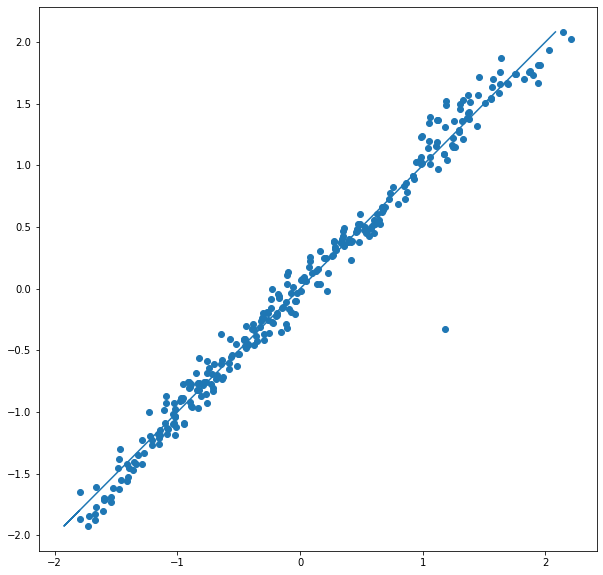

In [32]:
plt.figure(figsize=(10,10))
plt.plot(y,y)
plt.scatter(x, y)
plt.show